# Problem Set 3, due May 9th at 3:30pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python!

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [216]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import pylab

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset and print some descriptive information


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [34]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

---

## Part 1: Descriptive analysis

The goal of this section is to explore the data and make a few nice
visualizations -- before beginning the "real" work, we should dig into
the data a bit do see what we are dealing with.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.
  

### 1.1: Histogram of housing prices

Your first task is to make a histogram of 'MEDV' (the median hose
                                                  value, your target
                                                  variable), and make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


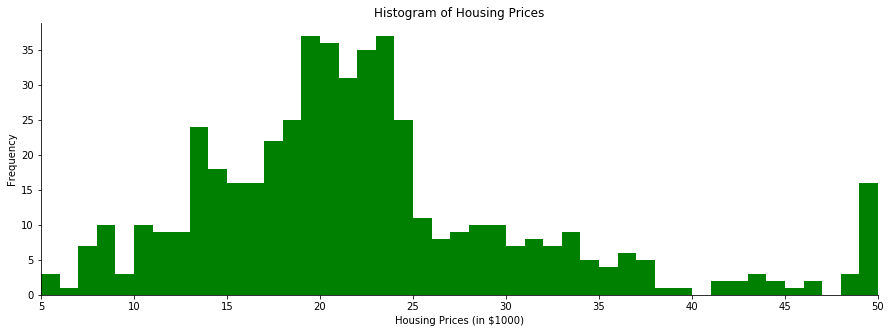

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

# generate a plot of fixed size
plt.figure(figsize = (15, 5))
hist = plt.subplot(111)

# plot the histogram of target variable
# Change the color of the bars to be green, and remove the black borders from the bars
# Because the target variable value is in $1000s, we can set the binwidth arguments to be 1, 1 to change the binwidth to be $1000
hist.hist(bdata.target, bins = np.arange(min(bdata.target), max(bdata.target)+ 1, 1), color = 'green', edgecolor = 'none')

# Remove the axes on the top and right side of the plot window
hist.spines['right'].set_visible(False)
hist.spines['top'].set_visible(False)
hist.yaxis.set_ticks_position('left')
hist.xaxis.set_ticks_position('bottom')

# Add appropriate labels to the x and y axes, make sure to include units
plt.xlabel('Housing Prices (in $1000)')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Prices')

# Adjust x-axis limit
plt.xlim([bdata.target.min(), bdata.target.max()])

plt.show()

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.  


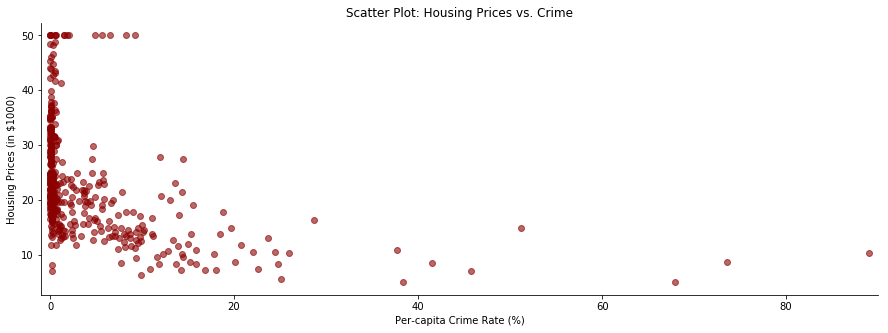

In [221]:
# generate a plot of fixed size
plt.figure(figsize = (15, 5))
scat = plt.subplot(111)

# insert a new column in the 2 dimensional array "data" to store the target value
new_data = np.insert(bdata.data, bdata.data.shape[1], bdata.target, axis = 1)

# plot the scatter plot
scat.scatter(new_data[:, 0], new_data[:, 13], color = 'darkred', alpha = 0.6)

# Remove the axes on the top and right side of the plot window
scat.spines['right'].set_visible(False)
scat.spines['top'].set_visible(False)
scat.yaxis.set_ticks_position('left')
scat.xaxis.set_ticks_position('bottom')

# Add appropriate labels to the x and y axes, make sure to include units
plt.xlabel('Per-capita Crime Rate (%)')
plt.ylabel('Housing Prices (in $1000)')
plt.title('Scatter Plot: Housing Prices vs. Crime')

# Adjust x-axis limit
plt.xlim([new_data[:,0].min()-1, new_data[:,0].max()+1])

plt.show()

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  

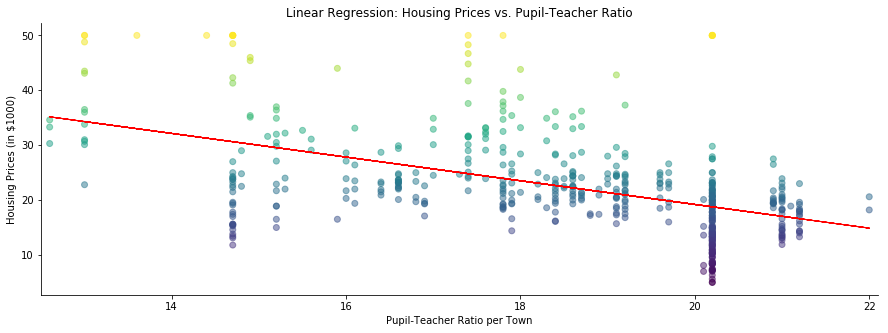

In [133]:
# Visualization: Explore the correlation between pupil-teacher ratio and housing price

# import linearRegression
from sklearn.linear_model import LinearRegression

# Generate a new plot of wanted size
plt.figure(figsize = (15, 5))
linalg = plt.subplot(111)

# Plot the scatter plot of housing price and pupil-teacher ratio to support linear fit
# Make the warmness of data point color correspond to the housing price: the warmer, the higher
linalg.scatter(new_data[:, 10], new_data[:, 13], alpha=0.5, c=new_data[:, 13])

# Generate linear fit by reshaping the data into a 2-D array
reg = LinearRegression()
pt_ratio = new_data[:, 10].reshape(len(new_data[:, 10]), 1)
reg.fit(new_data[:, 10].reshape(len(new_data[:, 10]), 1), new_data[:, 13])

# Add a linear fit line to the plot to indicate the potential relationship
plt.plot(pt_ratio, reg.predict(pt_ratio), color='red', linewidth=1)

# Remove the axes on the top and right side of the plot window
linalg.spines['right'].set_visible(False)
linalg.spines['top'].set_visible(False)
linalg.yaxis.set_ticks_position('left')
linalg.xaxis.set_ticks_position('bottom')

# Add appropriate labels to the x and y axes, make sure to include units
plt.xlabel('Pupil-Teacher Ratio per Town')
plt.ylabel('Housing Prices (in $1000)')
plt.title('Linear Regression: Housing Prices vs. Pupil-Teacher Ratio')

# Adjust x-axis limit
plt.xlim([new_data[:,10].min()-0.1, new_data[:,10].max()+0.1])

plt.show()

_**Interpretation:** from this visualization, we can see that as the pupil-teacher ratio increases, the overall housing prices in the town that has such ratio will decrease. The linear regression line also shows a negative  slope, indicating that with an increase of pupil-teacher ratio, we will observe a decrease in the housing price. Therefore, this shows us the impact of education condition on housing price. **Towns that have better educational resource (higher teacher-pupil ratio) tend to have higher housing prices.**_

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. 
Details of RMSE can be found in Hastie, Tibishrani, Friedman _The
Elements of Statistical Learning_, Ch 2.5.  (Available on the web)



In [85]:
def compute_rmse(predictions, yvalues):
    '''Given two arrays, one of actual values and one of predicted values,
    compute the Roote Mean Squared Error'''
    sqr_diff = (predictions - yvalues)**2
    rmse = np.sqrt(sqr_diff.sum()/len(yvalues))
    rmse = round(rmse, 2)
    return rmse

print(compute_rmse(np.array([2,2,3]),np.array([0,2,6])))

2.08


### 2.2 Divide your data into training and testing datasets


Randomly select 66% of the data and put this in a training dataset
(call this "bdata_train"), and place the remaining 34% in a testing
dataset (call this "bdata_test").  Please us 'np.random' for random numbers.


In [77]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

def divide(data, percentage):
    '''this function takes 2 parameters: data and percentage of training dataset,
    then it divides the dataset into training and testing datasets by firstly random shuffle 
    the input data and then cut the length of rows by corresponding percentage. Finally it
    returns 2 datasets: training and testing'''
    np.random.shuffle(data)
    train = data[0:percentage*len(data), :]
    test = data[percentage*len(data):, :]
    return train, test

# Divide the new_data dataset into 66% training and 34% testing
data_train, data_test = divide(new_data, 0.66)


/Users/Amit/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Amit/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### 2.3 Use a trivial baseline model for prediction, and compute RMSE
Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [87]:
print('Train RMSE:',compute_rmse([data_train[:,13].mean()], data_train[:,13]))
print('Test RMSE:',compute_rmse([data_train[:,13].mean()], data_test[:,13]))


Train RMSE: 9.06
Test RMSE: 9.43


_**The RMSE for training dataset is smaller than testing dataset.** This is what I expected, because in both of two calculations we use the mean values of median values of the training dataset as model. The differences between predicted values and y values of training set itself will be smaller than the differences between predicted values of training set and y values of testing set._

## Part 3: Nearest Neighbors

### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average
Value" baseline that you computed above.  Soon you will implement the
Nearest Neighbor algorithm, but first you need to create a distance
metric to measure the distance (and similarity) between two instances.
Write a generic function to compute the Lp-Norm distance. Verify that
your function works by computing the L-2 (Euclidean) distance and L-1 (Manhattan) distance between the points (3,4) and (6,8), and between (6,8) and (3,4).  Ensure that your distance is correct and positive in both cases!


In [121]:
def distance(x1, x2, L):
    '''this function takes two arrays x1 and x2, and a value L as input, 
    then calculates the L-norm distance beween x1 and x2'''
    dist = np.power(np.abs(x1-x2),L)
    if L == 1: # Manhattan
        res = np.power(dist.sum(axis=0), float(1)/L)
    else: # Euclidean
        res = np.power(dist.sum(axis=1),float(1)/L)
    return res

print(distance(np.array([3,4]), np.array([5,9]), 1))

7.0


### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as
you know, with Nearest Neighbors there is no real training, you just
need to keep your training data in memory.  Write a function that
predicts, for each instance in the testing data (bdata_test), the
median home value using the nearest neighbor algorithm we discussed in
class.  Since this is a small dataset, you can simply compare your
test instance to every instance in the training set, and return the
MEDV value of the closest training instance.  You can just loop over
the instances to find the nearest neighbor.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

Plot the true vs predicted price for your test data


Total Time is: 0.020948171615600586
RMSE is: 6.3


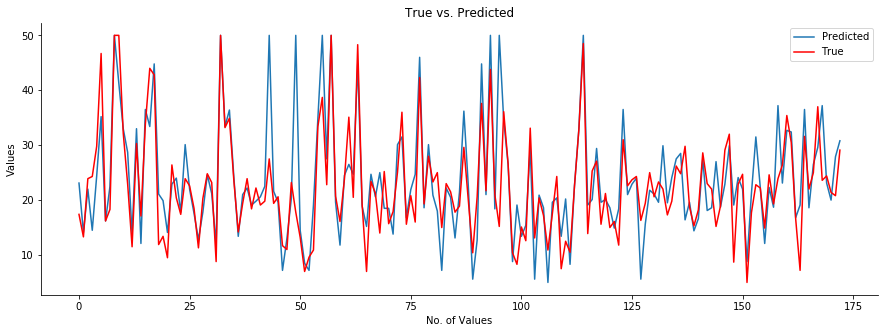

In [219]:
"""
This function takes two datasets (test & train), 
calculates the nearest neighbor and returns the RMSE value.
It takes 4 parameters: training set, testing set, column indexes that
indicates which columns we want to calculate the distance, and 
value of L to compute distances.

It returns the total time taken by the code, and rmse, and the plot
that compares the true vs predicted values for test data.

"""
import time

# Define a nearest neighbor function for use in following questions
def neighbor(train, test, column, target, L):
    start_time = time.time()
    final = []
    for i in range(len(test)):
        dist = distance(train[:, column], test[i, column], L)        
        dist = dist[:, np.newaxis]
        dist2 = np.append(dist, train[:,target],1)
        sortd = dist2[np.argsort(dist2[:,0]),:][0]  
        final.append(sortd)
    final2 = np.array(final)
    final2 = np.append(final2, test[:, target], axis = 1)
    rmse = compute_rmse(final2[:,1], final2[:,2])
    total_t = time.time() - start_time
    return total_t, rmse
    
# Define another function which adds a plot for this question
def neighbor_plot(train, test, column, target, L):
    start_time = time.time()
    final = []
    for i in range(len(test)):
        dist = distance(train[:, column], test[i, column], L)        
        dist = dist[:, np.newaxis]
        dist2 = np.append(dist, train[:,target],1)
        sortd = dist2[np.argsort(dist2[:,0]),:][0]  
        final.append(sortd)
    final2 = np.array(final)
    final2 = np.append(final2, test[:, target], axis = 1)
    rmse = compute_rmse(final2[:,1], final2[:,2])
    
    # Print results
    print('Total Time is:', time.time() - start_time)
    print('RMSE is:', rmse)
    
    # Add plots
    plt.figure(figsize = (15, 5))
    compare = plt.subplot(111)
    compare.plot(final2[:, 1], label='Predicted')
    compare.plot(final2[:, 2], c = 'r', label='True')
    compare.spines['right'].set_visible(False)
    compare.spines['top'].set_visible(False)
    compare.yaxis.set_ticks_position('left')
    compare.xaxis.set_ticks_position('bottom')
    pylab.legend(loc='upper right')
    plt.xlabel('No. of Values')
    plt.ylabel('Values')
    plt.title('True vs. Predicted')

neighbor_plot(data_train, data_test, [0,5], [13], 2)

### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Normalization is similar to Mahalanobis disctance (if the features are independent).  Read more in Daume (2017), _A Course in Machine Learning_ Chapter 4.3.  Write a simple generic normalization function that takes as input an array of values for a given feature, and returns the normalized array.  Do it well, you will need it in the future as well ;-)

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

Total Time is: 0.030803918838500977
RMSE is: 6.16


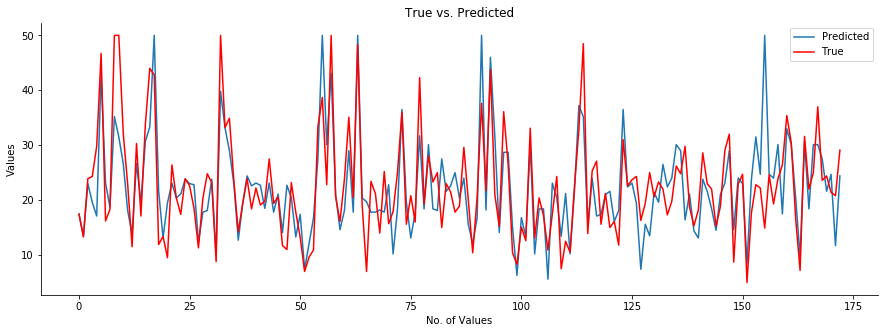

In [223]:
"""
This function takes a 2D array, then calculate the normalized array by compute 
the mean and standard deviation on the training set, and use these values to 
normalize the testing dataset
"""

def normalize(raw_data):
    normalized_data = (raw_data-np.mean(raw_data))/float(np.std(raw_data))
    return normalized_data

# Calculate normalized variables CRIM and RM for training set and testing set
test = np.vstack((normalize(data_test[:,0]),normalize(data_test[:,5]),(data_test[:,13]))).T
train = np.vstack((normalize(data_train[:,0]),normalize2(data_train[:,5]),(data_train[:,13]))).T
neighbor_plot(train, test, [0,1], [2], 2)

_Comparing the RMSE and plot with previous RMSE and plot, we can observe a lower RMSE and a better fit plot._

### 3.4 Optimization


A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!  

What combination of features and distance function provide the lowest RMSE?  Compre RMSEs with the corresponding true-predicted plots.

Do your decisions affect the running time of the algorithm?

In [190]:
'''
6 - AGE      proportion of owner-occupied units built prior to 1940
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
9 - TAX      full-value property-tax rate per $10,000
3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5 - NOX      nitric oxides concentration (parts per 10 million)
'''
# try a model that uses more than 4 features: CRIM, NOX, AGE, TAX, LSTAT
test = np.vstack((normalize(data_test[:,12]), normalize(data_test[:,0]), normalize(data_test[:,5]),normalize(data_test[:,6]),normalize(data_test[:,9]), (data_test[:,13]))).T
train = np.vstack((normalize(data_train[:,12]),normalize(data_train[:,0]), normalize(data_train[:,5]),normalize(data_train[:,6]),normalize(data_train[:,9]), (data_train[:,13]))).T

# try L value of 2
neighbor(train, test, [0,1,2,3,4], [5], 2)
# try L value of 4
neighbor(train, test, [0,1,2,3,4], [5], 4)


Total Time is: 0.04099416732788086
RMSE is: 4.14
Total Time is: 0.04802107810974121
RMSE is: 4.52


_From the nearest neighbor results, we can see that when the value of L increases, the time taken to calculate RMSE also increases, and the RMSE value of L-4 is slightly higher than L-2._

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see Daume (2017) _A Course in Machine Learning_, Ch 4.6).  Here you must implement a simple k-fold cross-validation algorithm yourself.  Essentially you have to partition your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in K-fold iterator -- do *not* use that here.)

Use Euclidean distance with CRIM and RM (0 and 5) as features.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations, and the total running time for all 10 iterations.  Compare the k-fold RMSE with the training-testing split RMSE above for the same hyperparameter values.

In [227]:
# Define the k-fold function: 
def kfold(data, K, func, L, column, target, k=1):
    start_time = time.time()
    rmse = []
    k_list = list(partition(range(len(data)),int(len(data)/K)))

    for i in range(K):
        test_ind = k_list[i]
        train_ind = range(len(data))
        train_ind = [elem for elem in train_ind if elem not in test_ind]
        train = data[train_ind,:]
        test = data[test_ind,:]
        
        # Calculate the RMSE of each of the k-folds using the input function
        rmse.append(func(train, test, column, target, L))
    print('Average RMSE is:', np.mean(rmse))
    print('Total Time is:', time.time() - start_time)

# Normalize the data
cv_data = np.vstack((normalize(bdata.data[:,0]), normalize(bdata.data[:,5]), (bdata.target))).T
kfold(cv_data, 10, neighbor, 2, [0,1], [2], 3)

Average RMSE is: 3.50140984964
Total Time is: 0.09151911735534668


### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [237]:
def knn(train, test, column, target, L, K = 3):
    start_time = time.time()
    final = []
    for j in range(len(test)):
        dist = distance(train[:, column], test[j, column], L)        
        dist = dist[:, np.newaxis]
        dist2 = np.append(dist, train[:, target], 1)
        sortd = dist2[np.argsort(dist2[:, 0]), :]
        final.append(np.mean(sortd[0:K], axis = 0))
    final = np.array(final)
    final2 = np.append(final, test[:, target], 1)
    rmse = compute_rmse(final2[:,1], final2[:, 2])

    print('Total Time is:', time.time() - start_time)
    print('RMSE is:', rmse)

knn(bdata_train, bdata_test, [0,5], [13], 2, 3)

Total Time is: 0.039376258850097656
RMSE is: 4.94


### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [241]:
'''
CRIM - 0
ZN - 1
RM - 5
AGE - 6
DIS - 7
TAX - 9
'''
# Normalize the raw dataset for use
norm_data = np.vstack((normalize(bdata.data[:,0]), normalize(bdata.data[:,1]), normalize(bdata.data[:,2]),
                     normalize(bdata.data[:,3]), normalize(bdata.data[:,4]), normalize(bdata.data[:,5]), 
                     normalize(bdata.data[:,6]), normalize(bdata.data[:,7]), normalize(bdata.data[:,8]),
                     normalize(bdata.data[:,9]), normalize(bdata.data[:,10]), normalize(bdata.data[:,11]),
                     normalize(bdata.data[:,12]), (bdata.target))).T
rmse = []
m = 100

# Find K value:
for i in range(25):
    rmse.append(kfold(norm_data, 10, knn, 2, [0,1,5,6,7,9], [13], i+1))
    if m > rmse[i]:
        m = rmse[i]
        res = i + 1

print('The best value of K for KNN is :', res)

Total Time is: 0.020677804946899414
RMSE is: 4.04
Total Time is: 0.012042999267578125
RMSE is: 2.61
Total Time is: 0.010612964630126953
RMSE is: 3.85
Total Time is: 0.010550975799560547
RMSE is: 7.37
Total Time is: 0.010523796081542969
RMSE is: 3.27
Total Time is: 0.010625839233398438
RMSE is: 4.63
Total Time is: 0.010466814041137695
RMSE is: 3.39
Total Time is: 0.011655807495117188
RMSE is: 13.3
Total Time is: 0.010442018508911133
RMSE is: 5.86
Total Time is: 0.010463237762451172
RMSE is: 6.86


TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*